# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [ ]:
data.shape

(48204, 9)

In [ ]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 4 Categorical Valuea and 6 Numerical Values.

In [ ]:
data.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
data['holiday'] = data['holiday'].fillna(0)

This will allow to remove missing values in the data

In [ ]:
data.isnull().sum()

,0
holiday,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


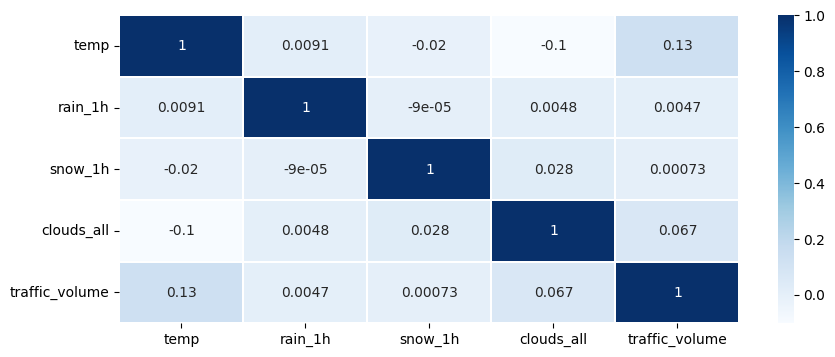

In [ ]:
# Correlation Plot
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,linewidths=0.3,cmap='Blues')
plt.show()

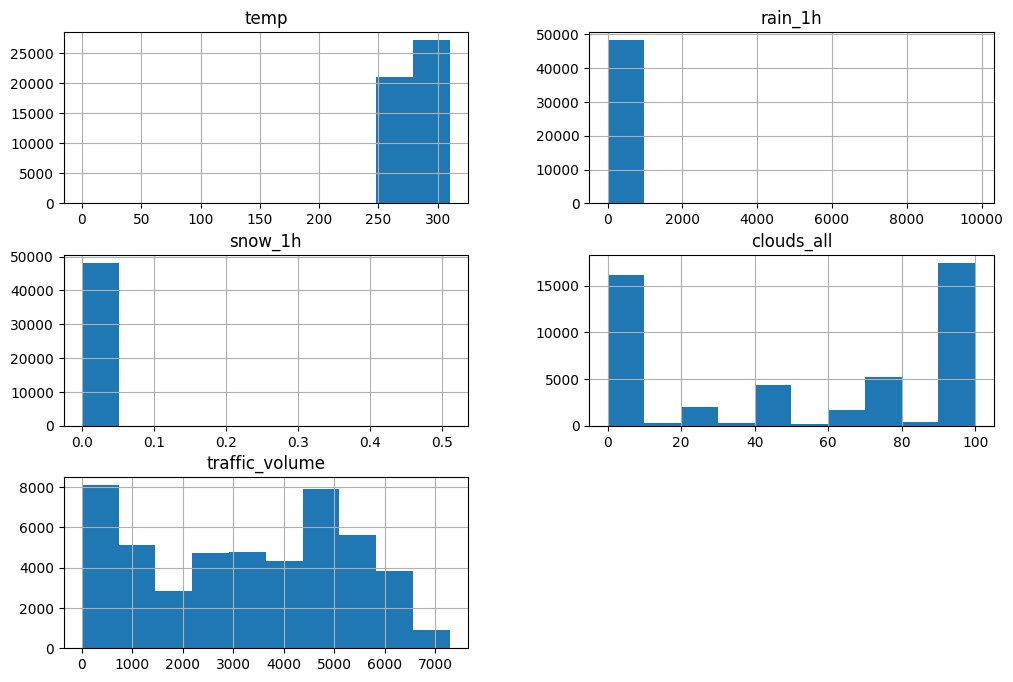

In [ ]:
# Visualizing with Numerical Variables
data.hist(figsize=(12,8))
plt.show()

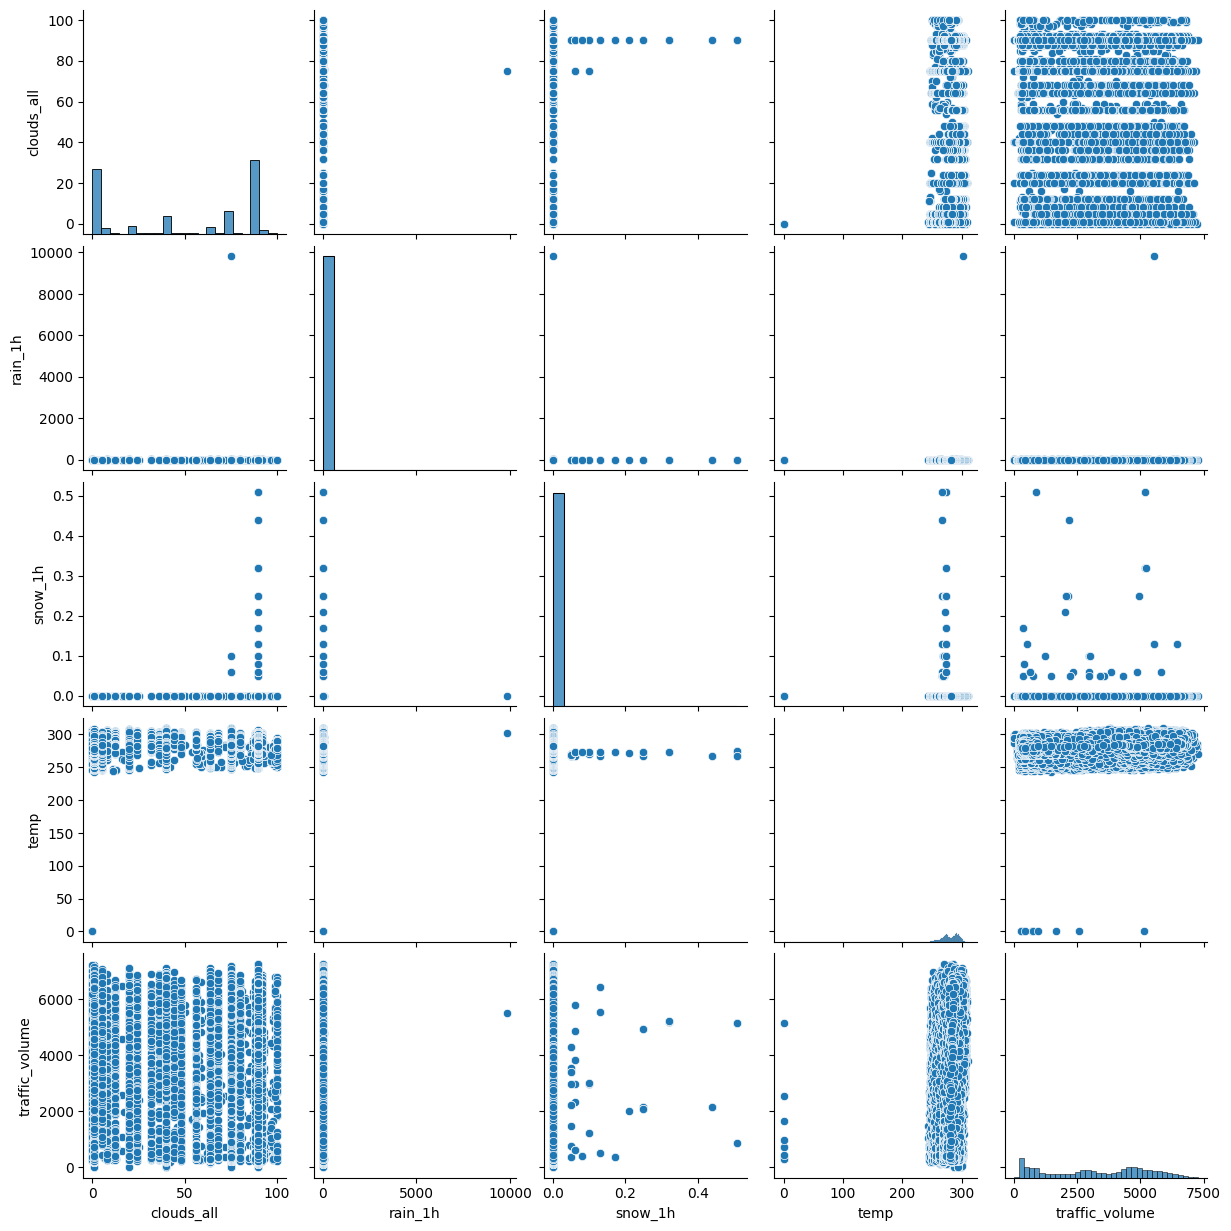

In [ ]:
# Outlier Detection
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(data[cols])
plt.show()

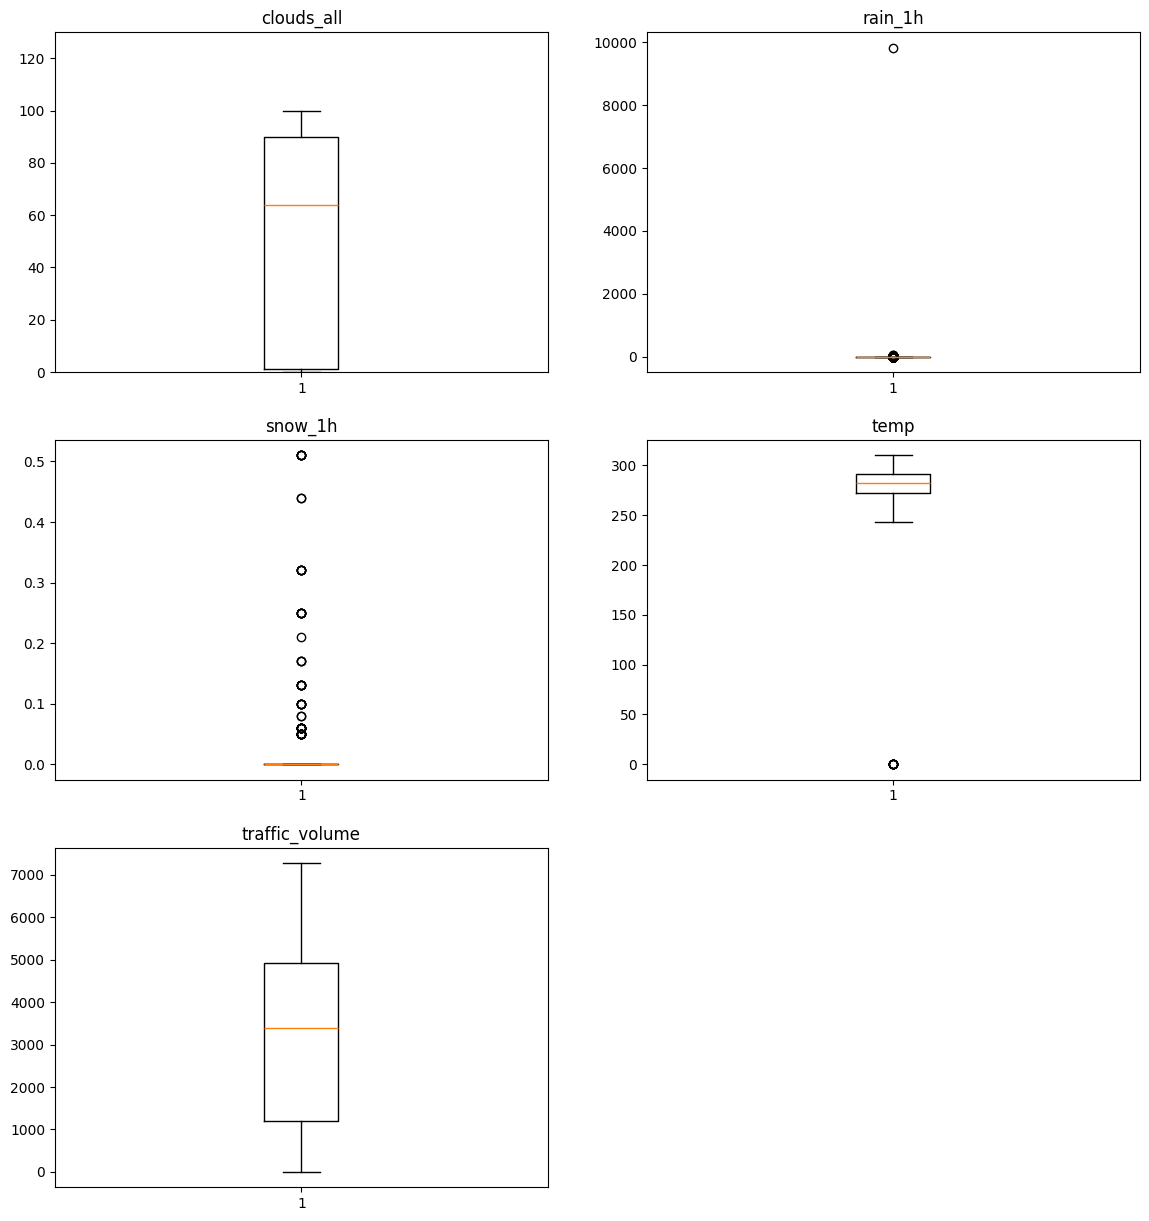

In [ ]:
# We will apply box plot for numerical variables

plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(data['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(data['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(data['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(data['traffic_volume'])
plt.title('traffic_volume')

plt.show()

From the Scatter Plot and Box Plot We can say there are outliers in the columns *rain_1h* and *temp* . Now we have to check whether its valid one or not. wheares *snow_1h* values are spread throughout the range.

In [ ]:

data[(data['rain_1h'] == data['rain_1h'].min())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:

data[(data['rain_1h'] == data['rain_1h'].max())]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
24872,0,302.11,9831.3,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


We found the min and max data range,we can understand that ~45k rows have 0 rain_h

 since it(The max rain) comes under very heavy rain. but we need to compare it with the other records which has *very heavy rain*.

In [ ]:
data[(data['weather_description']=='very heavy rain')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
7133,0,291.76,16.38,0.0,76,Rain,very heavy rain,2013-06-22 05:00:00,635
7179,0,295.82,44.45,0.0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802
7664,0,292.82,19.90,0.0,20,Rain,very heavy rain,2013-07-14 05:00:00,542
7667,0,292.65,25.32,0.0,8,Rain,very heavy rain,2013-07-14 06:00:00,958
7670,0,292.87,21.42,0.0,90,Rain,very heavy rain,2013-07-14 07:00:00,1745
8247,0,289.10,55.63,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
10734,0,262.65,18.80,0.0,64,Rain,very heavy rain,2013-12-16 19:00:00,2755
10806,0,264.50,28.70,0.0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190
14853,0,298.21,18.03,0.0,0,Rain,very heavy rain,2014-06-02 16:00:00,6443
16300,0,294.87,23.80,0.0,90,Rain,very heavy rain,2015-07-06 03:00:00,346


we can conclude that the data is an outlier or an type error when compared with the other relative data. data with clouds_all having higher value than this has less rain_1h. So it has to be handeled or dropped.
Similarly with the "temp*

# Pre Proccesing Data

In [ ]:
data1=pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [ ]:
data1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Further we will perform Linear Regression,so we nee dto convert the categorical variables to the numerical variables

In [ ]:
#So, I will using LableEncoders
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
Holiday_labels = le.fit_transform(data1['holiday'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Christmas Day',
 1: 'Columbus Day',
 2: 'Independence Day',
 3: 'Labor Day',
 4: 'Martin Luther King Jr Day',
 5: 'Memorial Day',
 6: 'New Years Day',
 7: 'State Fair',
 8: 'Thanksgiving Day',
 9: 'Veterans Day',
 10: 'Washingtons Birthday',
 11: nan}

In [ ]:
weather_main = le.fit_transform(data1['weather_main'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Clear',
 1: 'Clouds',
 2: 'Drizzle',
 3: 'Fog',
 4: 'Haze',
 5: 'Mist',
 6: 'Rain',
 7: 'Smoke',
 8: 'Snow',
 9: 'Squall',
 10: 'Thunderstorm'}

In [ ]:
weather_description = le.fit_transform(data1['weather_description'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'SQUALLS',
 1: 'Sky is Clear',
 2: 'broken clouds',
 3: 'drizzle',
 4: 'few clouds',
 5: 'fog',
 6: 'freezing rain',
 7: 'haze',
 8: 'heavy intensity drizzle',
 9: 'heavy intensity rain',
 10: 'heavy snow',
 11: 'light intensity drizzle',
 12: 'light intensity shower rain',
 13: 'light rain',
 14: 'light rain and snow',
 15: 'light shower snow',
 16: 'light snow',
 17: 'mist',
 18: 'moderate rain',
 19: 'overcast clouds',
 20: 'proximity shower rain',
 21: 'proximity thunderstorm',
 22: 'proximity thunderstorm with drizzle',
 23: 'proximity thunderstorm with rain',
 24: 'scattered clouds',
 25: 'shower drizzle',
 26: 'shower snow',
 27: 'sky is clear',
 28: 'sleet',
 29: 'smoke',
 30: 'snow',
 31: 'thunderstorm',
 32: 'thunderstorm with drizzle',
 33: 'thunderstorm with heavy rain',
 34: 'thunderstorm with light drizzle',
 35: 'thunderstorm with light rain',
 36: 'thunderstorm with rain',
 37: 'very heavy rain'}

In [ ]:
#Will apply this in our primary dataset
data1['holiday'] = le.fit_transform(data1['holiday'])
data1['weather_main'] = le.fit_transform(data1['weather_main'])
data1['weather_description'] = le.fit_transform(data1['weather_description'])

In [ ]:
data1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,11,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545
1,11,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516
2,11,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767
3,11,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026
4,11,291.14,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918


In [ ]:
data1['date_time'] = pd.to_datetime(data1['date_time'])
data1['year'] = data1['date_time'].dt.year
data1['month'] = data1['date_time'].dt.month
data1['day'] = data1['date_time'].dt.day
data1['hour'] = data1['date_time'].dt.hour
data1 = data1.drop('date_time', axis=1)
data1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,11,288.28,0.0,0.0,40,1,24,5545,2012,10,2,9
1,11,289.36,0.0,0.0,75,1,2,4516,2012,10,2,10
2,11,289.58,0.0,0.0,90,1,19,4767,2012,10,2,11
3,11,290.13,0.0,0.0,90,1,19,5026,2012,10,2,12
4,11,291.14,0.0,0.0,75,1,2,4918,2012,10,2,13


## Data Scaling
Dataset may contain columns highly varying in magnitudes, units and range. Scaling it will bring it to a Uniform Range.

There are three scaling types:

         Standard Scaler: Z-score Transformation
         MinMax Scalar  : Uses minimum and maximum value for transformation
         Robust Scalar  : Uses IQR for transformation

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

stdscalar = StandardScaler()

In [ ]:
data_stdscalar = stdscalar.fit_transform(data1)

In [ ]:
data_stdscalar = pd.DataFrame(data_stdscalar,columns=data.columns)

In [ ]:
data_stdscalar.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,0.031687,0.530370,-0.007463,-0.027228,-0.239963,-0.566905,0.831600,1.150159,-1.855294,1.02758,-1.574903,-0.345548
1,0.031687,0.611341,-0.007463,-0.027228,0.657120,-0.566905,-1.621016,0.632251,-1.855294,1.02758,-1.574903,-0.201459
2,0.031687,0.627836,-0.007463,-0.027228,1.041584,-0.566905,0.274187,0.758582,-1.855294,1.02758,-1.574903,-0.057371
3,0.031687,0.669071,-0.007463,-0.027228,1.041584,-0.566905,0.274187,0.888940,-1.855294,1.02758,-1.574903,0.086718
4,0.031687,0.744794,-0.007463,-0.027228,0.657120,-0.566905,-1.621016,0.834582,-1.855294,1.02758,-1.574903,0.230807


Min-Max Scalar

In [ ]:
MinMax = MinMaxScaler()
data_MinMax = MinMax.fit_transform(data1)
data_MinMax = pd.DataFrame(data_MinMax,columns=data1.columns)
data_MinMax.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,1.0,0.929726,0.0,0.0,0.40,0.1,0.648649,0.761676,0.0,0.818182,0.033333,0.391304
1,1.0,0.933209,0.0,0.0,0.75,0.1,0.054054,0.620330,0.0,0.818182,0.033333,0.434783
2,1.0,0.933918,0.0,0.0,0.90,0.1,0.513514,0.654808,0.0,0.818182,0.033333,0.478261
3,1.0,0.935692,0.0,0.0,0.90,0.1,0.513514,0.690385,0.0,0.818182,0.033333,0.521739
4,1.0,0.938949,0.0,0.0,0.75,0.1,0.054054,0.675549,0.0,0.818182,0.033333,0.565217


Robust Scalar

In [ ]:
Robust = RobustScaler()
data_Robust = Robust.fit_transform(data1)
data_Robust = pd.DataFrame(data_Robust,columns=data1.columns)
data_Robust.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,0.0,0.296753,0.0,0.0,-0.269663,0.0,0.411765,0.578877,-1.333333,0.6,-0.933333,-0.166667
1,0.0,0.351726,0.0,0.0,0.123596,0.0,-0.882353,0.303743,-1.333333,0.6,-0.933333,-0.083333
2,0.0,0.362924,0.0,0.0,0.292135,0.0,0.117647,0.370856,-1.333333,0.6,-0.933333,0.000000
3,0.0,0.390919,0.0,0.0,0.292135,0.0,0.117647,0.440107,-1.333333,0.6,-0.933333,0.083333
4,0.0,0.442329,0.0,0.0,0.123596,0.0,-0.882353,0.411230,-1.333333,0.6,-0.933333,0.166667


## Inference:
        The data is now transformed and it can be fit for modeling.
        The Ordinal values are converted into Nominal Values.
        The data is Scaled and brought into a uniform range.

#Complete Code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

# 2. Parse datetime
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour_of_day'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.weekday
df['day_of_month'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month

# 3. One-hot encode categorical features
# Limit one-hot features for 'holiday', 'weather_main', 'weather_description'
holiday_dummies = pd.get_dummies(df['holiday'], prefix='holiday')
weather_main_dummies = pd.get_dummies(df['weather_main'], prefix='weather_main')
weather_desc_dummies = pd.get_dummies(df['weather_description'], prefix='weather_description')

# To keep the same number of columns as your model expects (66), limit dummies:
# Top N frequent categories; rest grouped as "other"
def top_n_dummies(df, col, prefix, top_n):
    top_categories = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'other')
    return pd.get_dummies(df[col], prefix=prefix)

holiday_dummies = top_n_dummies(df.copy(), 'holiday', 'holiday', 11)
weather_main_dummies = top_n_dummies(df.copy(), 'weather_main', 'weather_main', 11)
weather_desc_dummies = top_n_dummies(df.copy(), 'weather_description', 'weather_description', 35)

# 4. Select numeric features
numeric_features = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all',
                       'hour_of_day', 'day_of_week', 'day_of_month', 'month', 'traffic_volume']]

# 5. Combine all features
final_df = pd.concat([
    numeric_features.drop(columns=['traffic_volume']),  # predictors
    holiday_dummies,
    weather_main_dummies,
    weather_desc_dummies,
    numeric_features['traffic_volume']  # target column at end
], axis=1)

# Confirm total number of features
# assert final_df.shape[1] == 66 + 1, f"Expected 66 features + target, got {final_df.shape[1]} columns"

# 6. Normalize all columns using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df)
scaled_df = pd.DataFrame(scaled_data, columns=final_df.columns)

# 7. Train-test split (time-based, not random)
train_size = int(len(scaled_df) * 0.8)
train_scaled_df = scaled_df.iloc[:train_size].copy()
test_scaled_df = scaled_df.iloc[train_size:].copy()

# 8. Save to CSV
train_scaled_df.to_csv("train_scaled.csv", index=False)
test_scaled_df.to_csv("test_scaled.csv", index=False)

print(" Preprocessing complete. Files saved: train_scaled.csv and test_scaled.csv")


 Preprocessing complete. Files saved: train_scaled.csv and test_scaled.csv


In [ ]:
# Import the relevant libraries
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Read the traffic data from the CSV training and test files
train_scaled_df = pd.read_csv('/content/train_scaled.csv')
test_scaled_df = pd.read_csv('/content/test_scaled.csv')

# Convert the DataFrames to NumPy arrays
train_scaled = train_scaled_df.to_numpy()
test_scaled = test_scaled_df.to_numpy()

# Write a function to create sequences from the data, returning NumPy arrays for modeling
# This is commonly used for time series data, where you use a sequence of past values to predict the next value
def create_sequences(data, seq_length, y_col_idx):
    """
    Generates input sequences and corresponding target values for time-series data.
    Parameters: input data, number of time steps in each sequence, target column name.
    Returns: NumPy arrays for input sequences an target values.
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length, y_col_idx]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences for the training and test data
X_train, y_train = create_sequences(train_scaled, 12, -1)
X_test, y_test = create_sequences(test_scaled, 12, -1)

# Create a TensorDataset for the training and test data for PyTorch modeling compatibility
dataset_train = TensorDataset(
    torch.tensor(X_train.astype(np.float32)).float(), torch.tensor(y_train.astype(np.float32)).float(),
)
dataset_test = TensorDataset(
    torch.tensor(X_test.astype(np.float32)).float(), torch.tensor(y_test.astype(np.float32)).float(),
)

# Create a DataLoader for the training and test data, loading the data in batches and shuffling the data
# Batch size 64 is a common choice to balance training speed and memory usage
# Shuffle is True to reduce the risk of overfitting
# Shuffle is False for test data following best practices
dataloader_train = DataLoader(dataset_train, batch_size=64, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=64, shuffle=False)

# Define an LSTM network
class TrafficVolume(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the LSTM layer
        # 66 for the input_size is the number of features
        # 64 is a common choice for hidden size
        # 2 layers are selected to help learn more complex time-series patterns
        self.lstm = nn.LSTM(
            input_size=66,
            hidden_size=64,
            num_layers=2,
            batch_first=True
        )
        # Define the activation function
        self.relu = nn.LeakyReLU()

        # Define the fully connected layer
        self.fc1 = nn.Linear(64, 1)

    def forward(self, x):
        # Capture the final hidden state
        _, (h_0, _) = self.lstm(x)
        # Take the hidden state from the last layer
        out = h_0[-1]
        # Apply ReLU
        return self.relu(self.fc1(out))

# Set-up for training
n_features = 66
hidden_size = 64
num_layers = 2

# Initialize the model, saving it to traffic_model
traffic_model = TrafficVolume()

# Define the loss function and optimizer
# MSE is commonly used for regression tasks
criterion = nn.MSELoss()
optimizer = optim.Adam(traffic_model.parameters(), lr=0.0001)

# Train the model with 2 epochs
final_training_loss = 0
for epoch in range(2):
    for batch_x, batch_y in dataloader_train:
        optimizer.zero_grad()
        outputs = traffic_model(batch_x)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, train loss: %1.5f" % (epoch+1, loss))
    final_training_loss = loss

# Set the model to evaluation mode
traffic_model.eval()

# Initialize variables to store outputs and labels
all_predictions = []
all_labels = []

# Disable gradient calculation during inference
with torch.no_grad():
    for seqs, labels in dataloader_test:
        outputs = traffic_model(seqs).squeeze()
        all_predictions.append(outputs)
        all_labels.append(labels)

# Concatenate all predictions and labels as PyTorch tensors
all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)

# Calculate MSE directly with PyTorch
test_mse = F.mse_loss(all_predictions, all_labels)

print(f'Test MSE: {test_mse.item()}')

TypeError: 'list' object is not callable

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['holiday'] = le.fit_transform(data1['holiday'])
data1['weather_main'] = le.fit_transform(data1['weather_main'])
data1['weather_description'] = le.fit_transform(data1['weather_description'])